In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn.linear_model
import seaborn as sns

In [2]:
# Load data
data = pd.read_csv("bottle.csv")

/Users/arielsmac/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Part A

In [3]:
# 1) Keep 5 features 
col_lst = ['T_degC','Salnty','STheta','O2ml_L','Depthm']
df = data[col_lst]

In [4]:
# 2) Remove NaN / NA values from dataset
df = df.dropna()
df.shape

(661268, 5)

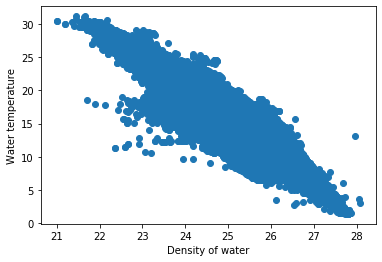

(661268, 5)

In [5]:
# 3) Remove any STheta outliers
plt.scatter(df['STheta'],df['T_degC'])
plt.xlabel('Density of water')
plt.ylabel('Water temperature')
plt.show()
df.drop(df[df['STheta'] >= 200].index, inplace = True)
df.shape

## Part B

In [6]:
# 1) Create X & y objects
y = np.asarray(df['T_degC'])
y = np.reshape(y,(len(y),1))
X = df.drop(['T_degC'], axis=1)
print(X.shape)
print(y.shape)

(661268, 4)
(661268, 1)


In [7]:
# 2) Generate X_train, X_test, y_train & y_test. Use 80% for train & 20% for test.
from sklearn.model_selection import train_test_split

# Set seed for reproducibility 
SEED = 3

# Split into train and test data
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state = SEED)

In [8]:
# 3) Scale all features to improve convergence in Gradient Descent.
from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler().fit(X_train)
X_train_scaled = stscaler.transform(X_train)
X_test_scaled = stscaler.transform(X_test)

## Part C

In [9]:
# 1) Create an instance of the LinearRegression class called "lin_reg". Fit lin_reg using X_train_scaled & y_train.
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# 2) Print out the coefficients (including the intercept)
lin_reg.intercept_, lin_reg.coef_

(array([10.9165682]),
 array([[ 1.63060628, -4.63321234,  0.30221399, -0.47497756]]))

In [11]:
# 3) Predict T_degC for the test data using lin_reg. Make sure to use X_test_scaled!
y_pred_sklearn = lin_reg.predict(X_test_scaled)
y_pred_sklearn

array([[ 8.90146724],
       [18.51002513],
       [18.14818182],
       ...,
       [-0.20118134],
       [ 5.5900904 ],
       [12.65795846]])

In [12]:
# 4) Calculate the following for the test data: mean squared error, r-squared, explained variance
from sklearn import metrics 
MSE_sklearn = metrics.mean_squared_error(y_test, y_pred_sklearn)
r2_sklearn = metrics.r2_score(y_test, y_pred_sklearn)
explained_var_sklearn = metrics.explained_variance_score(y_test, y_pred_sklearn)
print(MSE_sklearn)
print(r2_sklearn)
print(explained_var_sklearn)

0.11066262338144886
0.993818119771476
0.9938181771783683


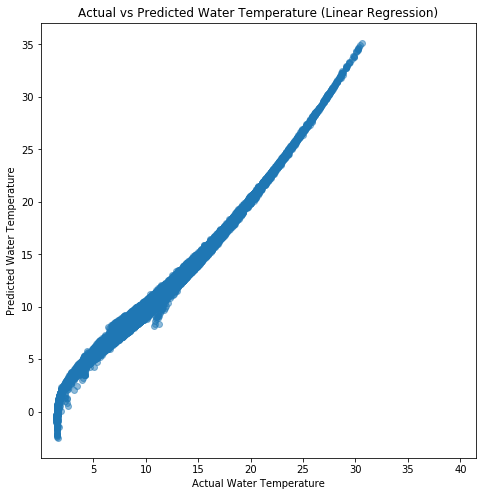

In [13]:
# 5) Create a scatterplot that shows actual versus predicted values for the T_degC
plt.figure(figsize=(16,8))
plt.scatter(x=y_test, y=y_pred_sklearn, alpha = 0.5)
plt.title('Actual vs Predicted Water Temperature (Linear Regression)')
plt.xlabel('Actual Water Temperature')
plt.ylabel('Predicted Water Temperature')
plt.axis('square')
plt.show()

## Part D

In [14]:
# 1) Add a column of 1s to X_train_scaled and X_test_scaled
X_b = np.c_[np.ones((len(X_train_scaled), 1)), X_train_scaled]  
X_b_new = np.c_[np.ones((len(X_test_scaled), 1)), X_test_scaled]  

In [15]:
# Perform the following steps for mini-batch sizes of: 50, 250, & 2000.
# 2) The cost function we will use for Gradient Descent is MSE.
# 3) Feel free to use any value for eta and epochs.
# 4) Calculate the following for the test data: mean squared error, r-squared, explained variance.
# 5) Create a scatterplot that shows actual versus predicted values for the T_degC for the test data.
# 6) Calculate the following for the training data: mean squared error, r-squared, explained variance   

In [16]:
# Set seed for reproducibility 
SEED = 42

# Write a minibatch gradient descent function to be used with different batch sizes 
def minibatch_gd(n_epochs, eta, minibatch_size, X_b, y): 
    theta_path_mgd = []
    m = len(X_b)
    
    # random initialization
    np.random.seed(SEED)
    theta = np.random.randn(X_b.shape[1],1)
    
    for epoch in range(n_epochs):
        shuffled_indices = np.random.permutation(m)
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0, m, minibatch_size):
            xi = X_b_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]
            gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
            theta = theta - eta * gradients
            theta_path_mgd.append(theta)
    return theta 

In [17]:
# Write a function for evaluation metrics 
def evaluation(test, pred): 
    MSE = metrics.mean_squared_error(test, pred)
    r2 = metrics.r2_score(test, pred)
    explained_var = metrics.explained_variance_score(test, pred)
    print("MSE:",MSE)
    print("R-squared:",r2)
    print("Explained Variance:", explained_var)

### Mini-Batch Size = 50 

In [18]:
theta_mgd_size50 = minibatch_gd(100, 0.1, 50, X_b, y_train)
theta_mgd_size50

array([[10.88760065],
       [ 1.62276277],
       [-4.58649163],
       [ 0.32861419],
       [-0.49718393]])

In [19]:
# Evaluate test data 
y_pred_size50 = X_b_new.dot(theta_mgd_size50)
evaluation(y_test,y_pred_size50)

MSE: 0.11187353775543911
R-squared: 0.9937504751829215
Explained Variance: 0.9937942017129615


In [20]:
MSE_pred_50 = metrics.mean_squared_error(y_test,y_pred_size50)
r2_pred_50 = metrics.r2_score(y_test,y_pred_size50)
explained_var_pred_50 = metrics.explained_variance_score(y_test,y_pred_size50)

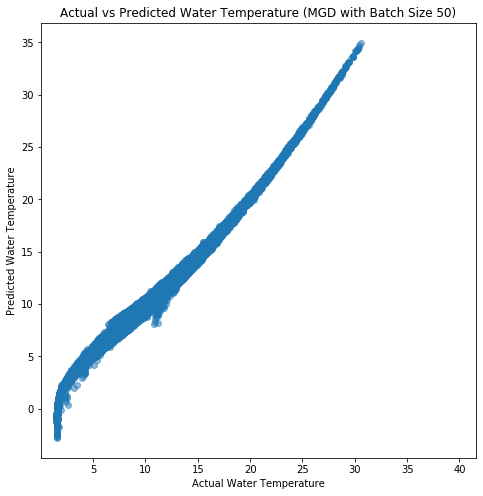

In [21]:
plt.figure(figsize=(16,8))
plt.scatter(x=y_test, y=y_pred_size50, alpha = 0.5)
plt.title('Actual vs Predicted Water Temperature (MGD with Batch Size 50)')
plt.xlabel('Actual Water Temperature')
plt.ylabel('Predicted Water Temperature')
plt.axis('square')
plt.show()

In [22]:
# Evaluate training data 
y_train_size50 = X_b.dot(theta_mgd_size50)
evaluation(y_train,y_train_size50)

MSE: 0.1120983519247126
R-squared: 0.9937139872588179
Explained Variance: 0.9937610415856313


In [23]:
MSE_train_50 = metrics.mean_squared_error(y_train,y_train_size50)
r2_train_50 = metrics.r2_score(y_train,y_train_size50)
explained_var_train_50 = metrics.explained_variance_score(y_train,y_train_size50)

### Mini-Batch Size = 250

In [24]:
theta_mgd_size250 = minibatch_gd(100, 0.1, 250, X_b, y_train)
theta_mgd_size250

array([[10.91217552],
       [ 1.62739543],
       [-4.61254699],
       [ 0.30693911],
       [-0.48392218]])

In [25]:
# Evaluate test data 
y_pred_size250 = X_b_new.dot(theta_mgd_size250)
evaluation(y_test,y_pred_size250)

MSE: 0.1107521093131953
R-squared: 0.9938131208721613
Explained Variance: 0.9938137565209223


In [26]:
MSE_pred_250 = metrics.mean_squared_error(y_test,y_pred_size250)
r2_pred_250 = metrics.r2_score(y_test,y_pred_size250)
explained_var_pred_250 = metrics.explained_variance_score(y_test,y_pred_size250)

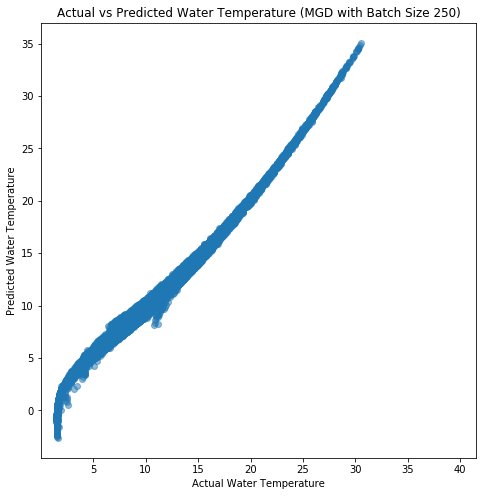

In [27]:
plt.figure(figsize=(16,8))
plt.scatter(x=y_test, y=y_pred_size250, alpha = 0.5)
plt.title('Actual vs Predicted Water Temperature (MGD with Batch Size 250)')
plt.xlabel('Actual Water Temperature')
plt.ylabel('Predicted Water Temperature')
plt.axis('square')
plt.show()

In [28]:
# Evaluate training data 
y_train_size250 = X_b.dot(theta_mgd_size250)
evaluation(y_train,y_train_size250)

MSE: 0.1108385109615873
R-squared: 0.9937846339383639
Explained Variance: 0.9937857159577945


In [29]:
MSE_train_250 = metrics.mean_squared_error(y_train,y_train_size250)
r2_train_250 = metrics.r2_score(y_train,y_train_size250)
explained_var_train_250 = metrics.explained_variance_score(y_train,y_train_size250)

### Mini-Batch Size = 2000

In [30]:
theta_mgd_size2000 = minibatch_gd(100, 0.1, 2000, X_b, y_train)
theta_mgd_size2000

array([[10.91538257],
       [ 1.62825059],
       [-4.63022053],
       [ 0.30432527],
       [-0.46830936]])

In [31]:
# Evaluate test data 
y_pred_size2000 = X_b_new.dot(theta_mgd_size2000)
evaluation(y_test,y_pred_size2000)

MSE: 0.11076235796095604
R-squared: 0.9938125483580547
Explained Variance: 0.9938125506819184


In [32]:
MSE_pred_2000 = metrics.mean_squared_error(y_test,y_pred_size2000)
r2_pred_2000 = metrics.r2_score(y_test,y_pred_size2000)
explained_var_pred_2000 = metrics.explained_variance_score(y_test,y_pred_size2000)

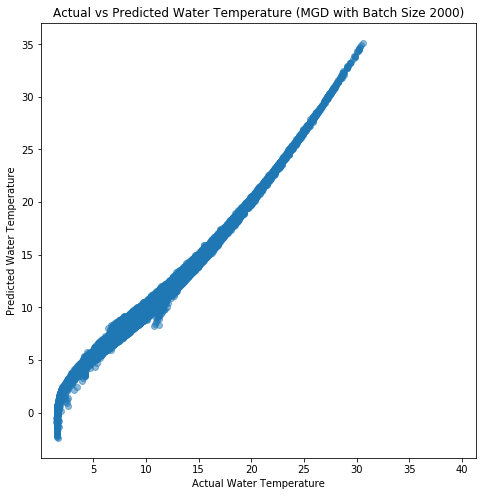

In [33]:
plt.figure(figsize=(16,8))
plt.scatter(x=y_test, y=y_pred_size2000, alpha = 0.5)
plt.title('Actual vs Predicted Water Temperature (MGD with Batch Size 2000)')
plt.xlabel('Actual Water Temperature')
plt.ylabel('Predicted Water Temperature')
plt.axis('square')
plt.show()

In [34]:
# Evaluate training data 
y_train_size2000 = X_b.dot(theta_mgd_size2000)
evaluation(y_train,y_train_size2000)

MSE: 0.11072891583291293
R-squared: 0.9937907795806806
Explained Variance: 0.9937908584080559


In [35]:
MSE_train_2000 = metrics.mean_squared_error(y_train,y_train_size2000)
r2_train_2000 = metrics.r2_score(y_train,y_train_size2000)
explained_var_train_2000 = metrics.explained_variance_score(y_train,y_train_size2000)

In [36]:
# Table with all the results for easy comparison
compare = pd.DataFrame({
    'Mini-Batch Size': [50,250,2000],
    
    'Test MSE': [MSE_pred_50, MSE_pred_250, MSE_pred_2000],
    
    'Train MSE': [MSE_train_50, MSE_train_250, MSE_train_2000],
    
    'Test R-Squared': [r2_pred_50, r2_pred_250, r2_pred_2000],
    
    'Train R-Squared': [r2_train_50, r2_train_250, r2_train_2000],
    
    'Test Explained Variance': [explained_var_pred_50, explained_var_pred_250, explained_var_pred_2000],
    
    'Train Explained Variance': [explained_var_train_50, explained_var_train_250, explained_var_train_2000]
    })

compare.sort_values(by='Test R-Squared', ascending=False)

,Mini-Batch Size,Test MSE,Train MSE,Test R-Squared,Train R-Squared,Test Explained Variance,Train Explained Variance
1,250,0.110752,0.110839,0.993813,0.993785,0.993814,0.993786
2,2000,0.110762,0.110729,0.993813,0.993791,0.993813,0.993791
0,50,0.111874,0.112098,0.993750,0.993714,0.993794,0.993761


## Part E

1) Describe how parameter estimation in Gradient Descent differs from using the normal equation.

In normal equation, to find the value of theta that minimizes the cost function, the normal euqation uses a closed-form solution which gives the computation result directly. In Gradient Descent, parameters are tweaked iteratively to minimize a cost function. It measures the local gradient of the error function with respect to theta and goes towards the direciton of decreasing gradient until it converges to a minimum.  

2) We used Mini-Batch Gradient descent here, but there are a variety of options for Gradient Descent. How is Mini-Batch Gradient Descent different from Stochastic Gradient Descent?

While Stochastic Gradient Descent picks a random instance in the training data at every step and computes the gradients based on that single instance, Mini-Batch Gradient Descent computes the gradients on small sets of instances (known as mini-batches) at each step. Mini-Batch Gradient Descents' progress in parameter space is less erratic than SGD, especially with larger batch sizes. Thus it will end up a bit closer to the minimum than Stochastic Gradient Descent. However, in the case where the cost function has local minima, it will be harder for Mini-Batch Gradient Descent to escape. 

3) Identify your best-performing version of Gradient Descent and compare the error metrics for test data vs training data. Does this version of gradient descent show signs of overfitting? Explain.

In [37]:
compare = pd.DataFrame({
    'Mini-Batch Size': [50,250,2000],
    
    'Test MSE': [MSE_pred_50, MSE_pred_250, MSE_pred_2000],
    
    'Train MSE': [MSE_train_50, MSE_train_250, MSE_train_2000],
    
    'Test R-Squared': [r2_pred_50, r2_pred_250, r2_pred_2000],
    
    'Train R-Squared': [r2_train_50, r2_train_250, r2_train_2000],
    
    'Test Explained Variance': [explained_var_pred_50, explained_var_pred_250, explained_var_pred_2000],
    
    'Train Explained Variance': [explained_var_train_50, explained_var_train_250, explained_var_train_2000]
    })

compare.sort_values(by='Test R-Squared', ascending=False)

,Mini-Batch Size,Test MSE,Train MSE,Test R-Squared,Train R-Squared,Test Explained Variance,Train Explained Variance
1,250,0.110752,0.110839,0.993813,0.993785,0.993814,0.993786
2,2000,0.110762,0.110729,0.993813,0.993791,0.993813,0.993791
0,50,0.111874,0.112098,0.993750,0.993714,0.993794,0.993761


The best performing version is mini-batch gradient descent with batch size of 250, which has the lowest test MSE, highest test R-squared and highest test explained variance. The MSE, r-squared and explained variance between train data and test data are very close to each other, with differences less than 0.0001. Since the generalization error is not greater than the training error, there's no issue of overfitting.  

4) Explain what the learning rate is for. Even though we did not, why might it be helpful to change the learning rate over time?

The learning rate is a hyperparameter used to control the size of the steps in Gradient Descent. If the learning rate is too low, it will take a long time for the algorithm to converge; if the learning rate is too high, the algorithm might diverge and fail to find a good solution. It would be helpful to decrease the learning rate over time, having the steps start out large to allow for fast progress and decreasing the size of the steps so that the algorithm can settle at the global minimum.  

5) Why would a data scientist want to use early stopping in gradient descent? 

Early stopping in gradient descent takes place when the validation error has reached a minimum. If we don't stop the algorithm, we will see that while the training error continue to decrease, the validation error starts to increase again. This suggests the model has started to overfit the training data. Thus, to prevent overfitting, we use early stopping to stop training once the validation error reaches the minumum. 